## Lead Score - Case Study

### Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading and Cleaning Data 

In [2]:
# reading data set
df_leads = pd.read_csv(r'Leads.csv')
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Inspect the dataframe

In [3]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
df_leads.shape

(9240, 37)

In [5]:
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Data Cleansing

In [6]:
# Converting all the values to lower case
df_leads = df_leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df_leads = df_leads.replace('select',np.nan)

In [8]:
# Checking if there are columns with one unique value since it won't affect our analysis
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns
df_leads_final= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
# Checking the percentage of missing values
round(100*(df_leads_final.isnull().sum()/len(df_leads_final.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Removing all the columns that are no required and have 35% null values
df_leads_final = df_leads_final.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df_leads_final.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

   ... What is your current occupation  \
0  ...                      unemployed   
1  ...                      unemployed   
2  ...                         student   
3  ...                      unemployed   
4  ...                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 22 columns]

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [12]:
df_leads_final['Specialization'] = df_leads_final['Specialization'].fillna('not provided') 
df_leads_final['What is your current occupation'] = df_leads_final['What is your current occupation'].fillna('not provided') 
df_leads_final['What matters most to you in choosing a course'] = df_leads_final['What matters most to you in choosing a course'].fillna('not provided')
df_leads_final['Country'] = df_leads_final['Country'].fillna('not provided')
df_leads_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
Prospect ID                                      9240 non-null object
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
What is your current occupation                  9240

In [13]:
# Checking the percentage of missing values
round(100*(df_leads_final.isnull().sum()/len(df_leads_final.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

There are very few null values in some of the columns, less than 2 %. So, we can remove those rows.

In [14]:
df_leads_final = df_leads_final.dropna(how='any',axis=0) 

In [15]:
df_leads_final.shape

(9074, 22)

In [16]:
# Checking the percentage of missing values
round(100*(df_leads_final.isnull().sum()/len(df_leads_final.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [17]:
df_leads_final.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

   ... What is your current occupation  \
0  ...                      unemployed   
1  ...                      unemployed   
2  ...                         student   
3  ...                      unemployed   
4  ...                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 22 columns]

In [18]:
# Clubbing the values of Country column
df_leads_final["Country"].value_counts()

india                   6491
not provided            2296
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
kuwait                     4
nigeria                    4
canada                     4
south africa               4
germany                    4
sweden                     3
asia/pacific region        2
uganda                     2
china                      2
philippines                2
bangladesh                 2
italy                      2
netherlands                2
ghana                      2
belgium                    2
indonesia                  1
vietnam                    1
russia                     1
sri lanka                  1
liberia                    1
malaysia      

In [19]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df_leads_final['Country'] = df_leads_final.apply(lambda x:slots(x['Country']), axis = 1)
df_leads_final['Country'].value_counts()

india            6491
not provided     2296
outside india     287
Name: Country, dtype: int64

In [20]:
#  All the categorical values
for column in df_leads_final:
    print(df_leads_final[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
539366d9-f633-455a-99e4-dbc5907db28e    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aaaaf89c-20bc-4974-8d0d-e31f1dc4f562    1
aab11d65-90a3-4f8a-98ac-58cfa19475ba    1
aab516e2-9881-4f4f-901a-cde597f7f9e9    1
aab6143a-424d-4a19-993e-03065412c420    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

In [21]:
# Removing Id values since they are unique for everyone
df_leads_final = df_leads_final.drop(['Prospect ID'],1)
df_leads_final.shape

(9074, 21)

In [22]:
df_leads_final

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website   not provided  ...   
1                     2.50             email opened          india  ...   
2                     2.00             email opened          india  ...   
3                     1.00              unreachable          india  ...   
4                     1.00        converted to lead          india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent          india  ...   
9237                  2.00                 sms sent          india  ...   
9238                  3.00                 sms sent          india  ...   
9239                  3.00                 sms sent  outside india  ...   

     What is your current occupation  \
0                         unemployed   
1                         unemployed   
2                            student   
3                         unemployed   
4                         unemployed   
...                              ...   
9235                      unemployed   
9236                      unemployed   
9237                      unemployed   
9238                    not provided   
9239                      unemployed   

     What matters most to you in choosing a course Search Newspaper Article  \
0                          better career prospects     no                no   
1                          better career prospects     no                no   
2                          better career prospects     no                no   
3                          better career prospects     no                no   
4                          better career prospects     no                no   
...                                            ...    ...               ...   
9235                       better career prospects     no                no   
9236                       better career prospects     no                no   
9237                       better career prospects     no                no   
9238                                  not provided     no                no   
9239                       better career prospects     no                no   

     X Education Forums Newspaper Digital Advertisement  \
0     

### EDA

### Univariate Analysis

#### Categorical Variables

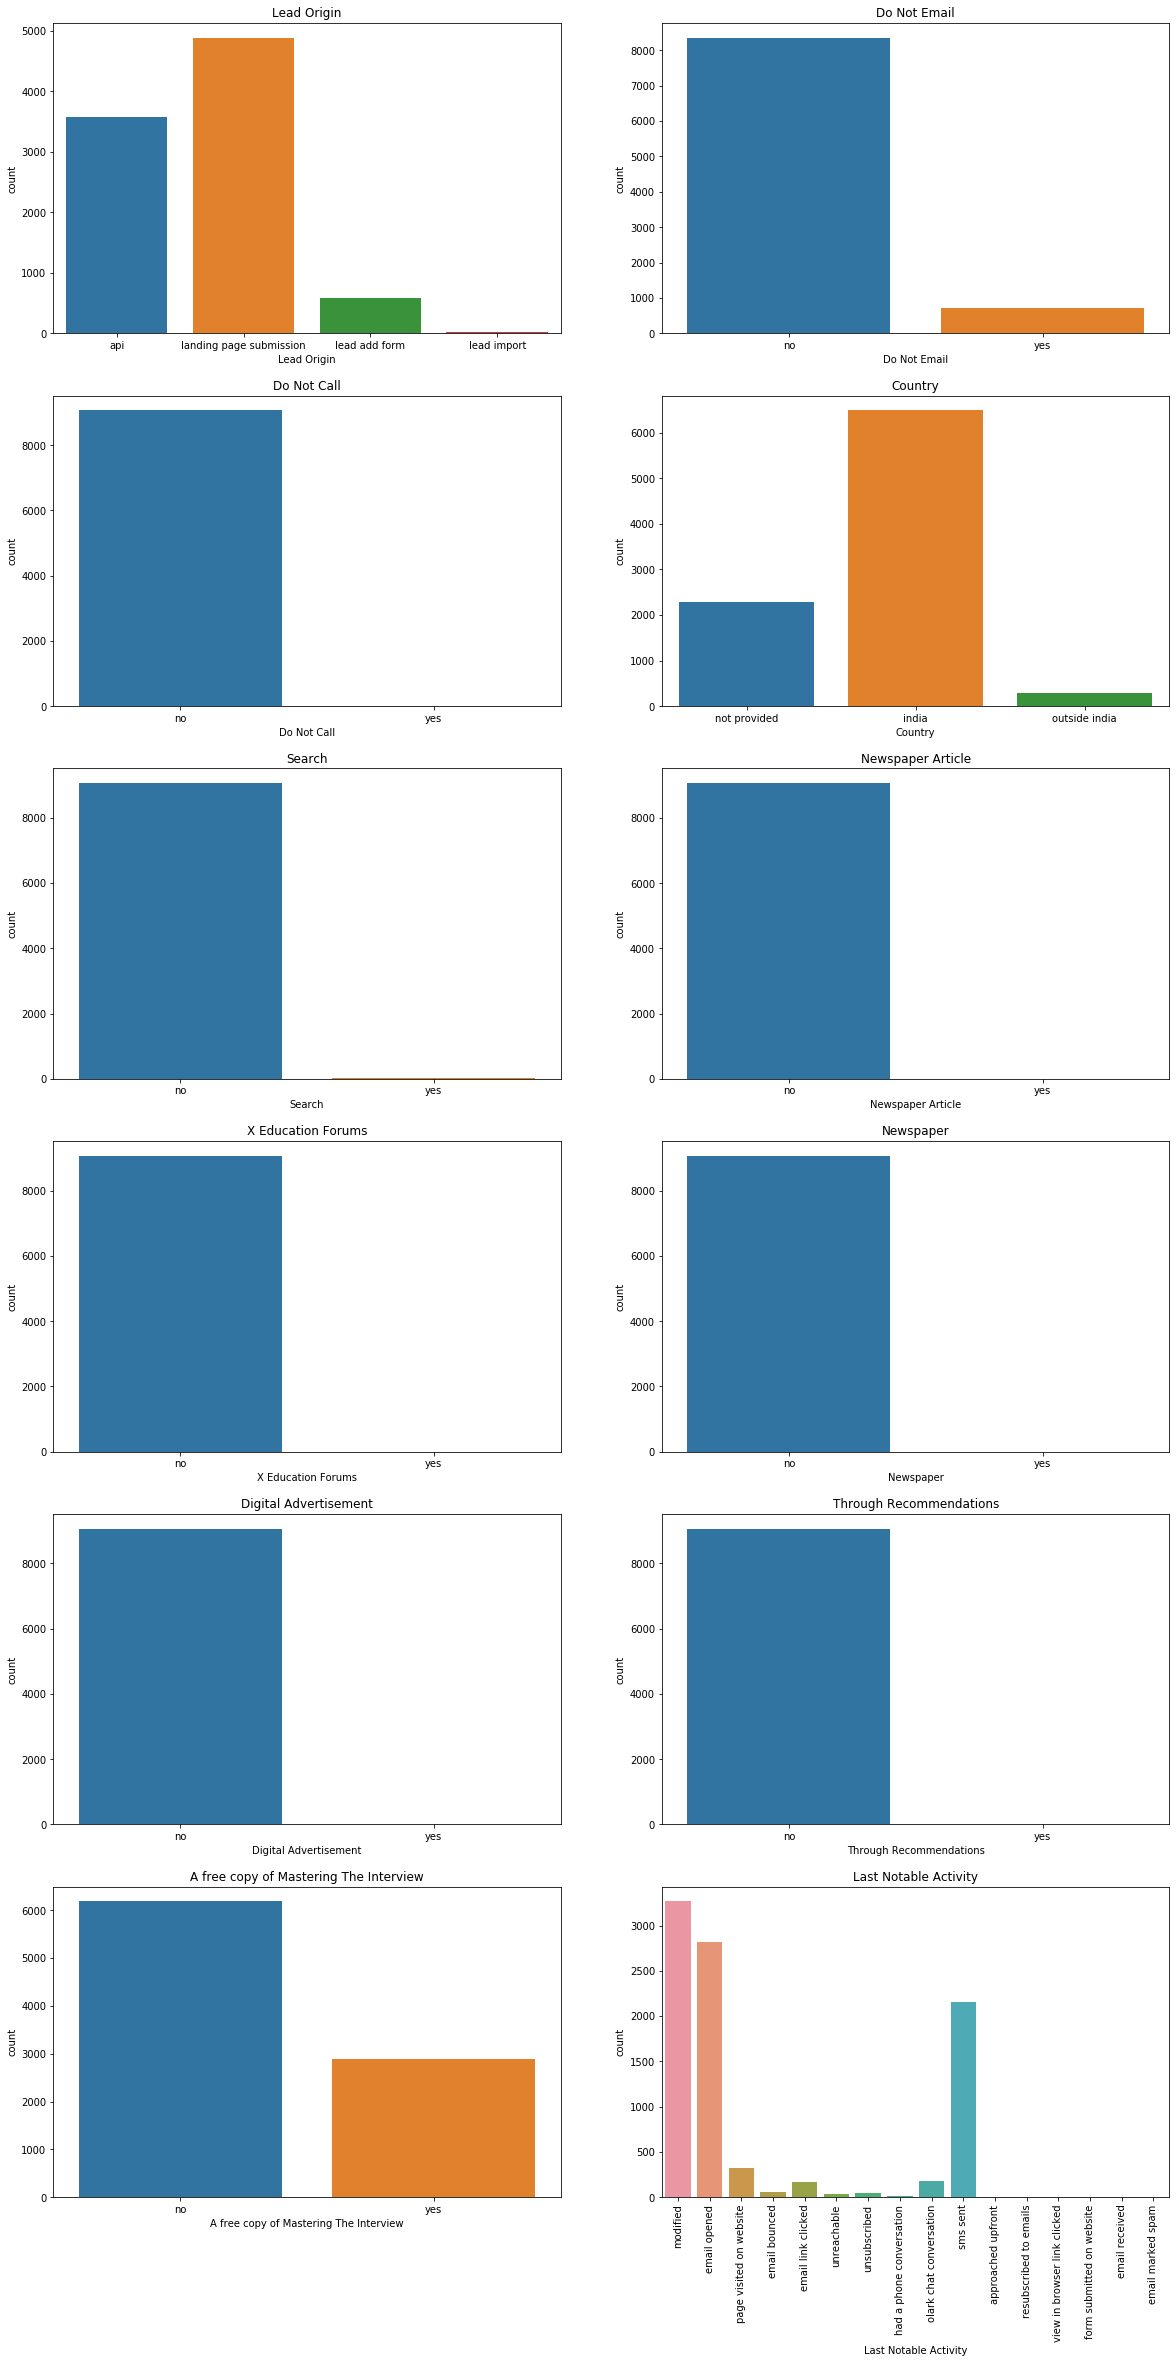

In [23]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_leads_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_leads_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_leads_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_leads_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_leads_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_leads_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_leads_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_leads_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_leads_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_leads_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_leads_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_leads_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

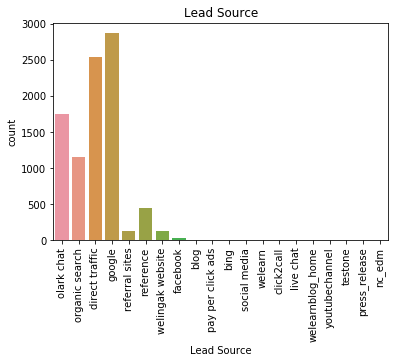

In [24]:
sns.countplot(df_leads_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

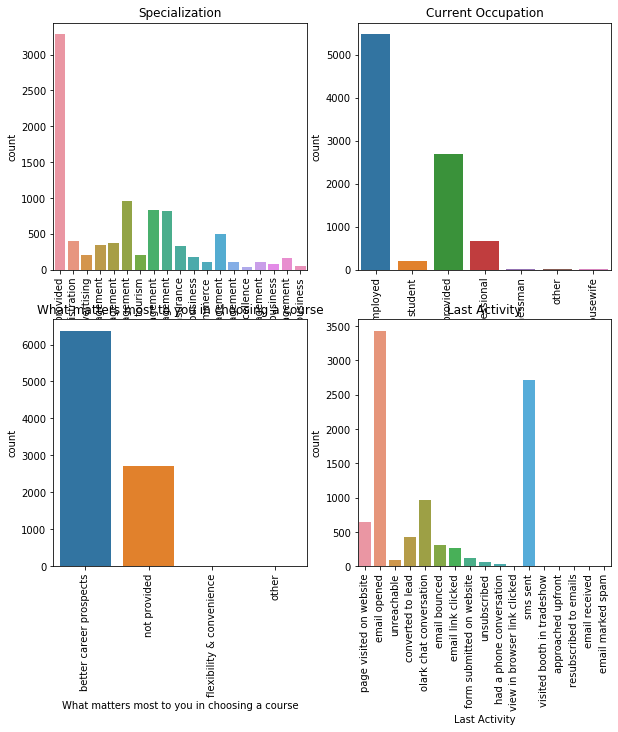

In [25]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(df_leads_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_leads_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_leads_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_leads_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

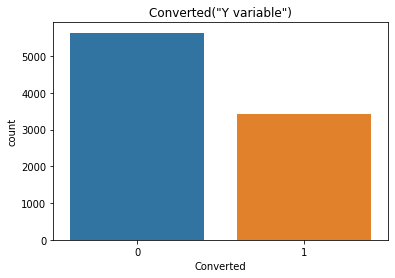

In [26]:
sns.countplot(df_leads_final['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Numerical Variables

In [27]:
df_leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074

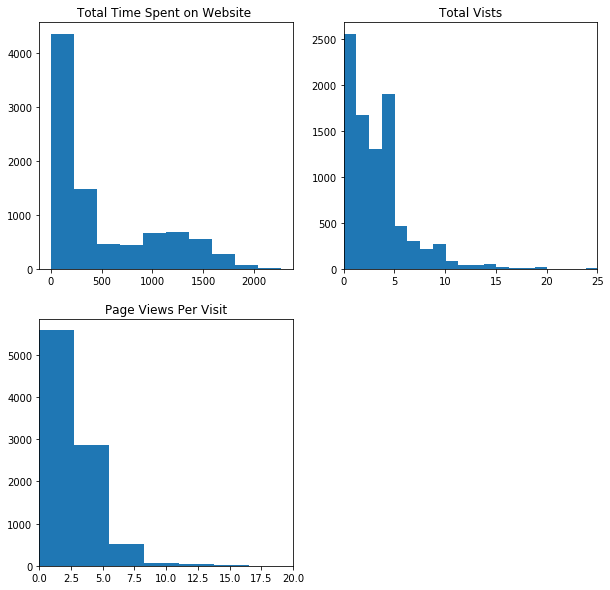

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(df_leads_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website ')

plt.subplot(2,2,2)
plt.hist(df_leads_final['TotalVisits'], bins = 200)
plt.title('Total Vists')
plt.xlim(0,25)

plt.subplot(2,2,3)
plt.hist(df_leads_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

### Relating all the categorical variables to Converted

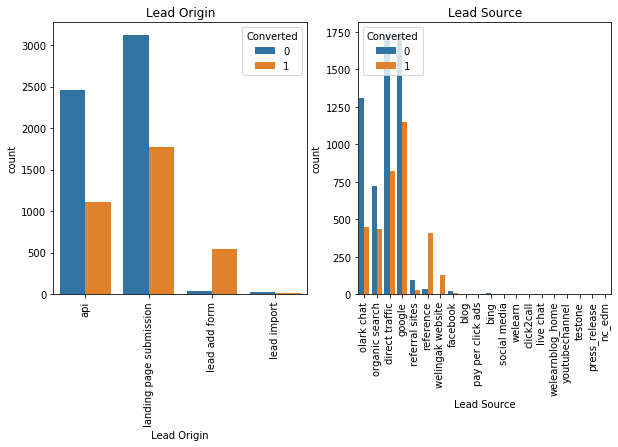

In [29]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

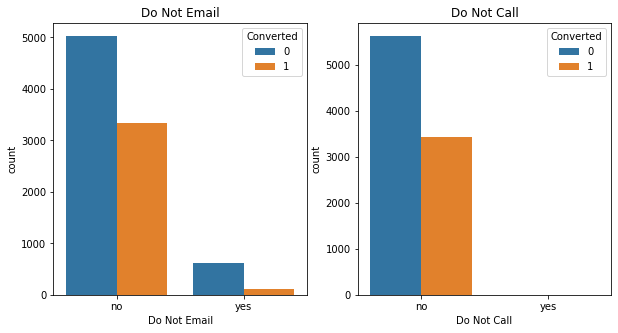

In [30]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_leads_final)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_leads_final)
plt.title('Do Not Call')
plt.show()

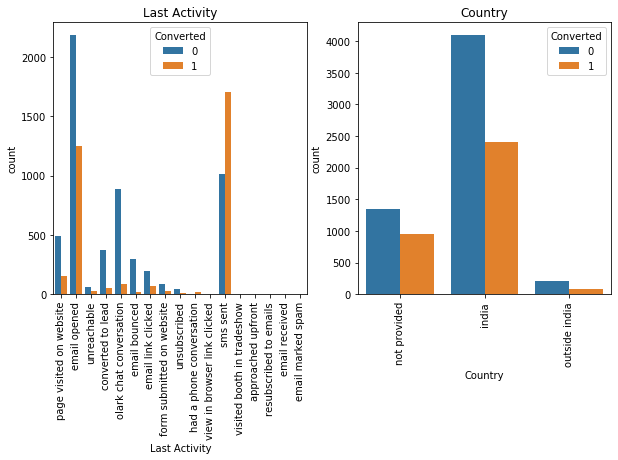

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

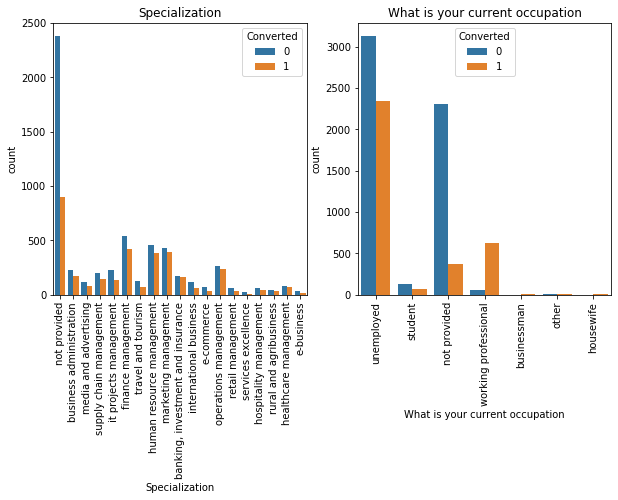

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

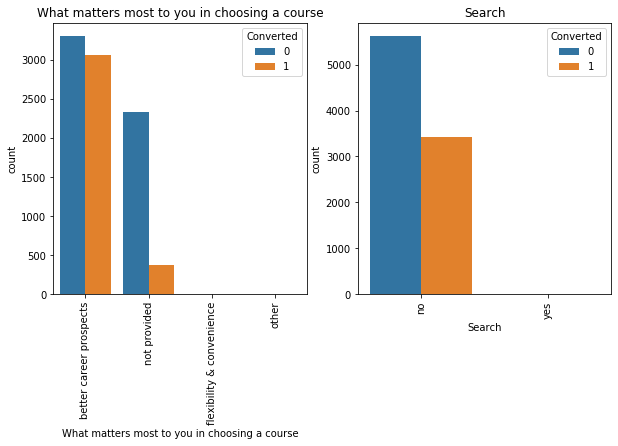

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

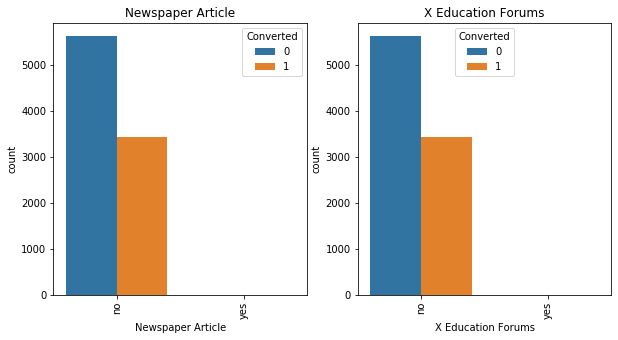

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data=df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

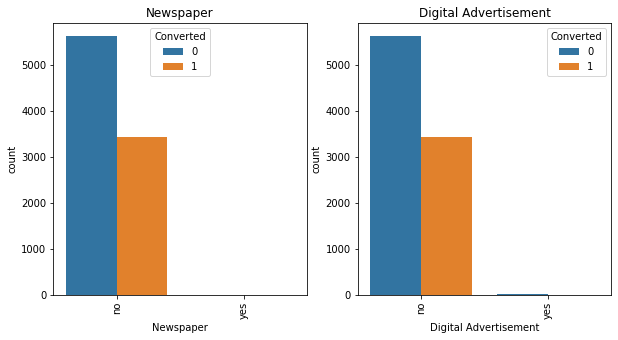

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

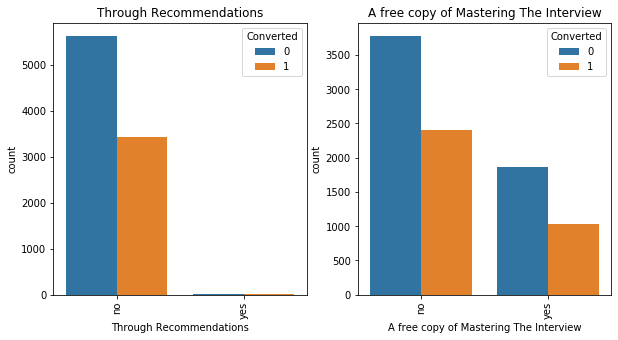

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

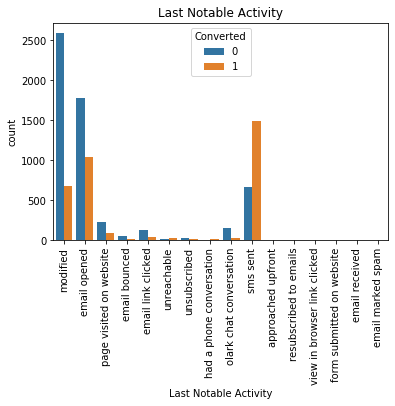

In [37]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

(4.0, 0.0)

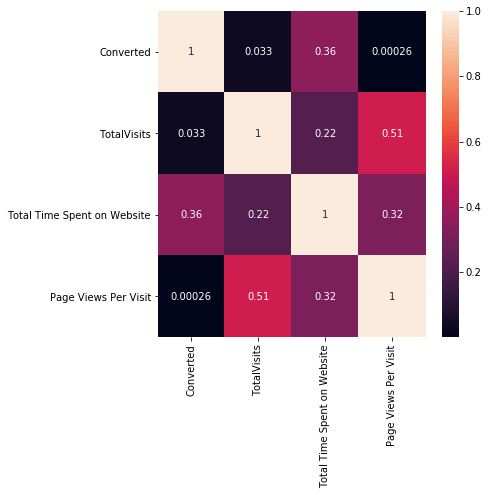

In [38]:
plt.figure(figsize = (6,6))        
ax = sns.heatmap(df_leads_final.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [39]:
numeric = df_leads_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

### Dummy Variables

In [40]:
df_leads_final.loc[:,df_leads_final.dtypes=="object"].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# Converting some binary variables (Yes/No) to 1/0

varlist =  ['Do Not Email', 'Do Not Call','A free copy of Mastering The Interview','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Search']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the list
df_leads_final[varlist] = df_leads_final[varlist].apply(binary_map)

In [42]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_leads_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_leads_final = pd.concat([df_leads_final, dummy], axis=1)
df_leads_final

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                         api      olark chat             0            0   
1                         api  organic search             0            0   
2     landing page submission  direct traffic             0            0   
3     landing page submission  direct traffic             0            0   
4     landing page submission          google             0            0   
...                       ...             ...           ...          ...   
9235  landing page submission  direct traffic             1            0   
9236  landing page submission  direct traffic             0            0   
9237  landing page submission  direct traffic             1            0   
9238  landing page submission          google             0            0   
9239  landing page submission  direct traffic             0            0   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website   not provided  ...   
1                     2.50             email opened          india  ...   
2                     2.00             email opened          india  ...   
3                     1.00              unreachable          india  ...   
4                     1.00        converted to lead          india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent          india  ...   
9237                  2.00                 sms sent          india  ...   
9238                  3.00                 sms sent          india  ...   
9239                  3.00                 sms sent  outside india  ...   

     Last Notable Activity_form submitted on website  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
9235                                               0   
9236                                               0   
9237                                               0   
9238                                               0   
9239                                               0   

     Last Notable Activity_had a phone conversation  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
9235                                              0   
9236                                              0   
9237                                              0   
9238                                              0   
9239                                              0   

     Last Notable Activity_modified  \
0                                 1   
1                                 0   
2                   

In [43]:
df_leads_final = df_leads_final.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_leads_final

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_landing page submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Specialization_business administration  Specialization_e-business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9235                                       0                          0   
9236                                       0                          0   
9237                                       1                          0   
9238                                       0                          0   
9239                                       0                          0   

      Specialization_e-commerce  ...  \
0                             0  ...   
1                             0  ...   
2                             0  ...   
3                             0  ...   
4                             0  ...   
...                         ...  ...   
9235                          0  ...   
9236                          0  ...   
9237                          0  ...   
9238                          0  ...   
9239                          0  ...   

      Last Notable Activity_form submitted on website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                    

In [44]:
df_leads_final.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Origin_lead import',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_blog',
       'Lead Source

## Test-Train Split

In [45]:
# Import the required library
from sklearn.model_selection import train_test_split

In [46]:
# Putting feature variable to X
X = df_leads_final.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Specialization_business administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_e-business  Specialization_e-commerce  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_finance management  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0     

In [47]:
# Putting response variable to y
y = df_leads_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009     0.007968                     0.178347              0.083333   
1012     0.007968                     0.085355              0.083333   
9226     0.000000                     0.000000              0.000000   
4750     0.007968                     0.619946              0.083333   
7987     0.019920                     0.711590              0.104167   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_lead import  Specialization_business administration  \
3009                        0                                       0   
1012                        0                                       0   
9226                        0                                       0   
4750                        0                                       0   
7987                        0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
3009                          0                          0   
1012                          0                          0   
9226                          0                          0   
4750                          0                          0   
7987                          0                          0   

      Specialization_finance management  ...  \
3009                                  1  ...   
1012                                  0  ...   
9226                                  0  ...   
4750                                  0  ...   
7987                                  1  ...   

      Last Notable Activity_form submitted on website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_had a phone conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_olark chat conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_page visited on website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
3009                               0                    

In [50]:
### Checking the Conversion  Rate
conversion = (sum(df_leads_final['Converted'])/len(df_leads_final['Converted'].index))*100
conversion

37.85541106458012

We have almost 38 % conversion rate

##  Model Building

In [51]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
# Import RFE
from sklearn.feature_selection import RFE

In [53]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [54]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 41),
 ('Specialization_business administration', False, 36),
 ('Specialization_e-business', False, 25),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 29),
 ('Specialization_healthcare management', False, 30),
 ('Specialization_hospitality management', False, 59),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 40),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 24),
 ('Specialization_media and advertising', False, 52),
 ('Specialization_operations management', False, 32),
 ('Specialization_retail management', False, 51),
 ('Specialization_rural and agribusiness', False, 37),
 ('Specialization_serv

In [55]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [56]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [57]:
# Importing statsmodels
import statsmodels.api as sm

In [58]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.8
Date:                Mon, 07 Sep 2020   Deviance:                       5451.6
Time:                        15:37:58   Pearson chi2:                 6.66e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1812      0.085    -13.878      0.000      -1.348      -1.014
TotalVisits                                              6.7478      2.200      3.067      0.002       2.436      11.060
Total Time Spent on Website                              4.6393      0.162     28.677      0.000       4.322       4.956
Lead Origin_lead add form                                2.5708      0.225     11.415      0.000       2.129       3.012
Lead Source_direct traffic                              -1.6795      0.120    -14.049      0.000      -1.914      -1.445
Lead Source_google                                      -1.2705      0.114    -11.173      0.000      -1.493      -1.048
Lead Source_organic search                              -1.5337      0.141    -10.908      0.000      -1.809      -1.258
Lead Source_referral sites                              -1.7637      0.345     -5.110      0.000      -2.440      -1.087
Lead Source_welingak website                             1.9919      0.756      2.634      0.008       0.510       3.474
Last Activity_email bounced                             -2.0438      0.371     -5.506      0.000      -2.771      -1.316
Last Activity_olark chat conversation                   -1.4424      0.160     -8.991      0.000      -1.757      -1.128
Last Activity_sms sent                                   1.2740      0.073     17.489      0.000       1.131       1.417
What is your current occupation_housewife               23.1739   1.54e+04      0.002      0.999   -3.01e+04    3.02e+04
What is your current occupation_working professional     2.7820      0.185     15.031      0.000       2.419       3.145
Last Notable Activity_had a phone conversation           3.5970      1.098      3.277      0.001       1.446       5.748
Last Notable Activity_unreachable                        1.8496      0.470      3.937      0.000       0.929       2.770
========================================================================================================================
"""

In [59]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Total Time Spent on Website  2.34
4                                  Lead Source_google  1.94
3                          Lead Source_direct traffic  1.80
0                                         TotalVisits  1.70
10                             Last Activity_sms sent  1.52
2                           Lead Origin_lead add form  1.51
5                          Lead Source_organic search  1.48
7                        Lead Source_welingak website  1.33
12  What is your current occupation_working profes...  1.18
8                         Last Activity_email bounced  1.07
6                          Lead Source_referral sites  1.05
9               Last Activity_olark chat conversation  1.03
11          What is your current occupation_housewife  1.01
14                  Last Notable Activity_unreachable  1.01
13     Last Notable Activity_had a phone conversation  1.00

The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_housewife'

In [61]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [62]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.2
Date:                Mon, 07 Sep 2020   Deviance:                       5462.5
Time:                        15:37:58   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1784      0.085    -13.853      0.000      -1.345      -1.012
TotalVisits                                              6.6504      2.185      3.044      0.002       2.369      10.932
Total Time Spent on Website                              4.6375      0.162     28.703      0.000       4.321       4.954
Lead Origin_lead add form                                2.5949      0.225     11.539      0.000       2.154       3.036
Lead Source_direct traffic                              -1.6743      0.119    -14.026      0.000      -1.908      -1.440
Lead Source_google                                      -1.2676      0.114    -11.161      0.000      -1.490      -1.045
Lead Source_organic search                              -1.5191      0.140    -10.835      0.000      -1.794      -1.244
Lead Source_referral sites                              -1.7609      0.345     -5.106      0.000      -2.437      -1.085
Lead Source_welingak website                             1.9676      0.756      2.602      0.009       0.486       3.449
Last Activity_email bounced                             -2.0505      0.371     -5.525      0.000      -2.778      -1.323
Last Activity_olark chat conversation                   -1.4459      0.160     -9.015      0.000      -1.760      -1.132
Last Activity_sms sent                                   1.2677      0.073     17.417      0.000       1.125       1.410
What is your current occupation_working professional     2.7772      0.185     15.007      0.000       2.414       3.140
Last Notable Activity_had a phone conversation           3.5929      1.098      3.273      0.001       1.442       5.744
Last Notable Activity_unreachable                        1.8435      0.470      3.925      0.000       0.923       2.764
========================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Total Time Spent on Website  2.34
4                                  Lead Source_google  1.94
3                          Lead Source_direct traffic  1.80
0                                         TotalVisits  1.70
10                             Last Activity_sms sent  1.52
2                           Lead Origin_lead add form  1.51
5                          Lead Source_organic search  1.48
7                        Lead Source_welingak website  1.33
11  What is your current occupation_working profes...  1.18
8                         Last Activity_email bounced  1.07
6                          Lead Source_referral sites  1.05
9               Last Activity_olark chat conversation  1.03
13                  Last Notable Activity_unreachable  1.01
12     Last Notable Activity_had a phone conversation  1.00

##  Creating Prediction

In [64]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.122113
1012    0.157473
9226    0.522306
4750    0.792982
7987    0.863831
1281    0.726643
2880    0.086420
4971    0.898254
7536    0.802285
1248    0.830157
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12211317, 0.15747333, 0.52230643, 0.79298164, 0.86383051,
       0.72664344, 0.08642023, 0.89825366, 0.80228522, 0.83015701])

In [66]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred,'Lead_Score':y_train_pred*100})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  Lead_Score  Prospect ID
0          0         0.122113   12.211317         3009
1          0         0.157473   15.747333         1012
2          0         0.522306   52.230643         9226
3          1         0.792982   79.298164         4750
4          1         0.863831   86.383051         7987

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [67]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead_Score  Prospect ID  Predicted
0          0         0.122113   12.211317         3009          0
1          0         0.157473   15.747333         1012          0
2          0         0.522306   52.230643         9226          1
3          1         0.792982   79.298164         4750          1
4          1         0.863831   86.383051         7987          1

In [68]:
from sklearn import metrics

In [69]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3419  486]
 [ 732 1714]]


In [70]:
# Predicted     not_converted    converted
# Actual
# not_converted        3419      486
# converted            732       1714  

In [71]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8082191780821918

### Metrics beyond simply accuracy

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7007358953393296

In [74]:
# Let us calculate specificity
TN / float(TN+FP)

0.8755441741357234

In [75]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12445582586427657


In [76]:
# positive predictive value 
print (TP / float(TP+FP))

0.7790909090909091


In [77]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8236569501324982


### Plotting the ROC Curve

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

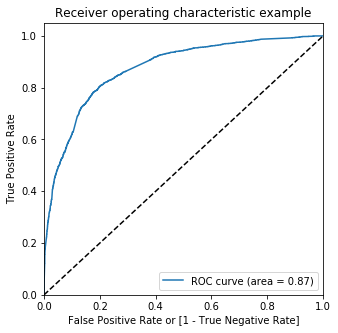

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead_Score  Prospect ID  Predicted  0.0  0.1  \
0          0         0.122113   12.211317         3009          0    1    1   
1          0         0.157473   15.747333         1012          0    1    1   
2          0         0.522306   52.230643         9226          1    1    1   
3          1         0.792982   79.298164         4750          1    1    1   
4          1         0.863831   86.383051         7987          1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    1    1    1    1    0    0    0    0  
3    1    1    1    1    1    1    0    0  
4    1    1    1    1    1    1    1    0

In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.593135  0.968929  0.357746
0.2   0.2  0.719414  0.923140  0.591805
0.3   0.3  0.791214  0.827882  0.768246
0.4   0.4  0.808062  0.760425  0.837900
0.5   0.5  0.808219  0.700736  0.875544
0.6   0.6  0.785860  0.573181  0.919078
0.7   0.7  0.774209  0.495094  0.949040
0.8   0.8  0.753582  0.409648  0.969014
0.9   0.9  0.704771  0.251840  0.988476


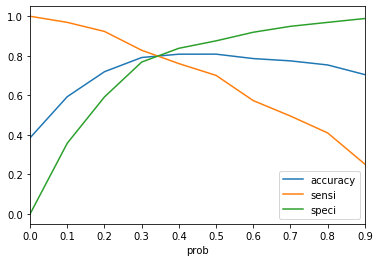

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Lead_Score  Prospect ID  Predicted  0.0  0.1  \
0          0         0.122113   12.211317         3009          0    1    1   
1          0         0.157473   15.747333         1012          0    1    1   
2          0         0.522306   52.230643         9226          1    1    1   
3          1         0.792982   79.298164         4750          1    1    1   
4          1         0.863831   86.383051         7987          1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0    0                0  
2    1    1    1    1    0    0    0    0                1  
3    1    1    1    1    1    1    0    0                1  
4    1    1    1    1    1    1    1    0                1

In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8025507794048181

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3158,  747],
       [ 507, 1939]], dtype=int64)

In [87]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7927228127555193

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.8087067861715749

In [90]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1912932138284251


In [91]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7218912881608339


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8616643929058663


#### Precision and Recall

In [93]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3419,  486],
       [ 732, 1714]], dtype=int64)

#### Precision
#### TP / TP + FP

In [94]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7790909090909091

#### Recall
#### TP / TP + FN

In [95]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7007358953393296

In [96]:
from sklearn.metrics import precision_score, recall_score

In [97]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7790909090909091

In [98]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7007358953393296

### Precision and recall tradeoff

In [99]:
from sklearn.metrics import precision_recall_curve

In [100]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

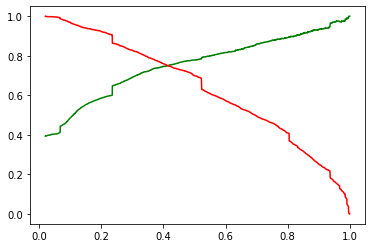

In [102]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead_Score  Prospect ID  Predicted  0.0  0.1  \
0          0         0.122113   12.211317         3009          0    1    1   
1          0         0.157473   15.747333         1012          0    1    1   
2          0         0.522306   52.230643         9226          1    1    1   
3          1         0.792982   79.298164         4750          1    1    1   
4          1         0.863831   86.383051         7987          1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0    0                0  
2    1    1    1    1    0    0    0    0                1  
3    1    1    1    1    1    1    0    0                1  
4    1    1    1    1    1    1    1    0                1

In [104]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8074319004881121

In [105]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3286,  619],
       [ 604, 1842]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [107]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.748476229175132

In [108]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7530662305805397

### Making predictions on the test set

In [109]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [110]:
# Substituting all the columns in the final train model
col = X_train.columns

In [111]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


const  TotalVisits  Total Time Spent on Website  \
3271    1.0     0.015936                     0.070530   
1490    1.0     0.019920                     0.679695   
7936    1.0     0.007968                     0.033243   
4216    1.0     0.000000                     0.000000   
3830    1.0     0.031873                     0.073675   
...     ...          ...                          ...   
850     1.0     0.011952                     0.372417   
2879    1.0     0.007968                     0.264600   
6501    1.0     0.031873                     0.599730   
7155    1.0     0.011952                     0.231357   
376     1.0     0.015936                     0.167116   

      Lead Origin_lead add form  Lead Source_direct traffic  \
3271                          0                           0   
1490                          0                           1   
7936                          0                           0   
4216                          1                           0   
3830                          0                           0   
...                         ...                         ...   
850                           0                           0   
2879                          0                           0   
6501                          0                           1   
7155                          0                           1   
376                           0                           0   

      Lead Source_google  Lead Source_organic search  \
3271                   1                           0   
1490                   0                           0   
7936                   1                           0   
4216                   0                           0   
3830                   0                           1   
...                  ...                         ...   
850                    1                           0   
2879                   1                           0   
6501                   0                           0   
7155                   0                           0   
376                    1                           0   

      Lead Source_referral sites  Lead Source_welingak website  \
3271                           0                             0   
1490                           0                             0   
7936                           0                             0   
4216                           0                             0   
3830                           0                             0   
...                          ...                           ...   
850                            0                             0   
2879                           0                             0   
6501                           0                             0   
7155                           0                             0   
376                            0                             0   

      Last Activity_email bounced  Last Activity_olark chat conversation  \
3271                            0                                      0   
1490                            0                                      0   
7936                            0                                      0   
4216                            0                                      0   
3830                            0                                      0   
...                           ...                                    ...   
850                             0                                      0   
2879                            0                                      0   
6501                            0                                      0   
7155                            0                                      0   
376                             0                                      0   

      Last Activity_sms sent  \
3271                       0   
1490                       0   
7936                       0   
4216                       0   
3830                     

In [112]:
y_test_pred = res.predict(X_test_sm)

In [113]:
y_test_pred[:10]

3271    0.117855
1490    0.961174
7936    0.096319
4216    0.804796
3830    0.104907
1800    0.656673
6507    0.303630
4821    0.201198
4223    0.936088
4714    0.522306
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

0
3271  0.117855
1490  0.961174
7936  0.096319
4216  0.804796
3830  0.104907

In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.117855
1          1         1490  0.961174
2          0         7936  0.096319
3          1         4216  0.804796
4          0         3830  0.104907

In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [123]:
# Let's see the head of y_pred_final
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  Lead_Score
0         3271          0         0.117855   11.785452
1         1490          1         0.961174   96.117397
2         7936          0         0.096319    9.631884
3         4216          1         0.804796   80.479612
4         3830          0         0.104907   10.490731

In [124]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [125]:
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  Lead_Score  final_predicted
0         3271          0         0.117855   11.785452                0
1         1490          1         0.961174   96.117397                1
2         7936          0         0.096319    9.631884                0
3         4216          1         0.804796   80.479612                1
4         3830          0         0.104907   10.490731                0

In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8082996694821888

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1467,  267],
       [ 255,  734]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7421638018200202

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8460207612456747

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.